#                                  Heart failure prediction

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [18]:
#Loading dataset
df=pd.read_csv("heart.csv")
df.dropna(axis=0)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
#One hot encoding, converting categorical features into numeric
df= pd.get_dummies(df, columns = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

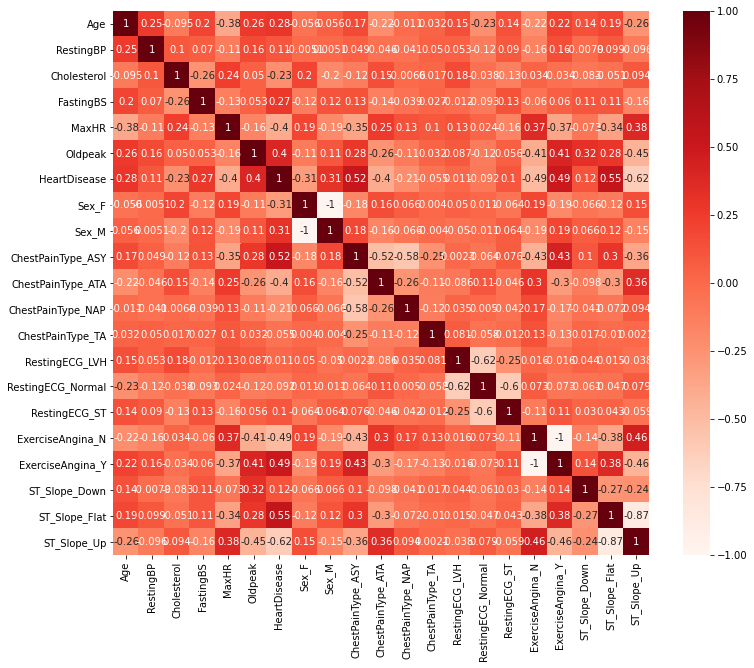

In [20]:
# Correlation matrix for feature selection
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#Selecting highly correlated features
cor_target = abs(cor["HeartDisease"])
relevant_features = cor_target[cor_target>0.4]
relevant_features

MaxHR                0.400421
Oldpeak              0.403951
HeartDisease         1.000000
ChestPainType_ASY    0.516716
ChestPainType_ATA    0.401924
ExerciseAngina_N     0.494282
ExerciseAngina_Y     0.494282
ST_Slope_Flat        0.554134
ST_Slope_Up          0.622164
Name: HeartDisease, dtype: float64

from the correlation matrix we can infer all the independent variables are weakly correlated with each other except ExerciseAngina_N and ExerciseAngina_Y hence we'll consider only one of them while predicting heart failure

In [52]:
dfnew=df[["MaxHR","Oldpeak","ChestPainType_ASY","ChestPainType_ATA","ExerciseAngina_N","ST_Slope_Flat","ST_Slope_Up","HeartDisease"]]
dfnew.head()

,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ExerciseAngina_N,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,172,0.0,0,1,1,0,1,0
1,156,1.0,0,0,1,1,0,1
2,98,0.0,0,1,1,0,1,0
3,108,1.5,1,0,0,1,0,1
4,122,0.0,0,0,1,0,1,0


In [53]:
X=dfnew.drop(["HeartDisease"],axis=1)
Y=dfnew["HeartDisease"]
X=np.array(X)
Y=np.array(Y)

In [54]:
# train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [55]:
#training our model and assessing its performence
clf = LogisticRegression(penalty='l1',tol=0.0001, C=1.0, random_state=0, solver='liblinear').fit(X_train, Y_train)
Y_pred=clf.predict(X_test)
f1_score(Y_test, Y_pred, average='macro')

0.8088283314038056

In [56]:
print("True value:",Y_test[0])
print("Predicted value:",Y_pred[0])

True value: 0
Predicted value: 0


The model accurately predicts the heart failure. Here 0 means heart does not fail so for the case of nonfailure of heart our model predict nonfailure.